In [24]:
%matplotlib inline

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [26]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [27]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"
brakeDir = "../data/output/brake/"
accelDIr = "../data/output/accel/"
steeringPositiveDir = "../data/output/steeringPositive/"
steeringNegativeDir = "../data/output/steeringNegative/"

In [28]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]

In [29]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")

In [30]:
rmf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
rmf = rmf[["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive",  "steeringNegative"]]

In [31]:
rmf.describe()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,24.628866,142.494845,70.706186,127.809278,40.561856,59.819588,45.886598,69.077320
std,42.578259,115.097312,124.268434,342.086072,58.297600,73.636859,102.050874,199.483632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.750000,0.000000,0.000000,1.000000,8.250000,1.000000,0.000000
50%,3.000000,136.500000,5.000000,1.000000,15.000000,23.000000,2.000000,2.000000
75%,26.750000,218.500000,94.750000,26.500000,55.000000,89.500000,25.500000,23.750000
max,188.000000,543.000000,709.000000,2380.000000,321.000000,389.000000,527.000000,1460.000000


# show each grid

In [32]:
nf = rmf.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

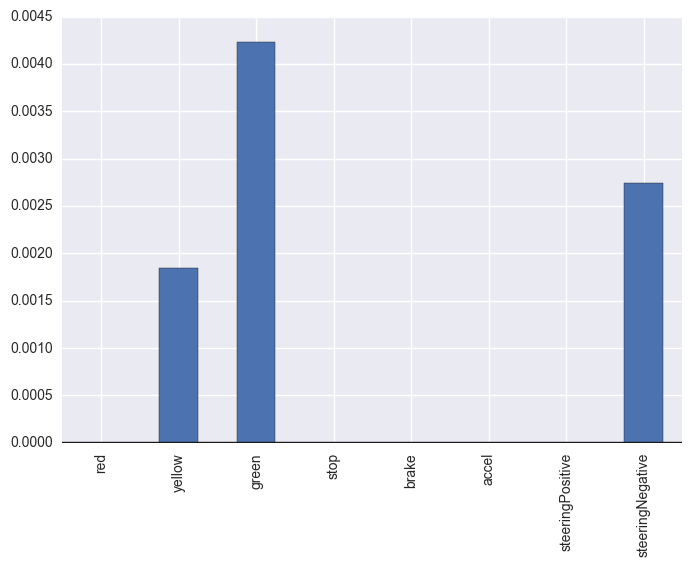

In [33]:
nf.ix[64].plot(kind='bar')
plt.axhline(0, color='k')

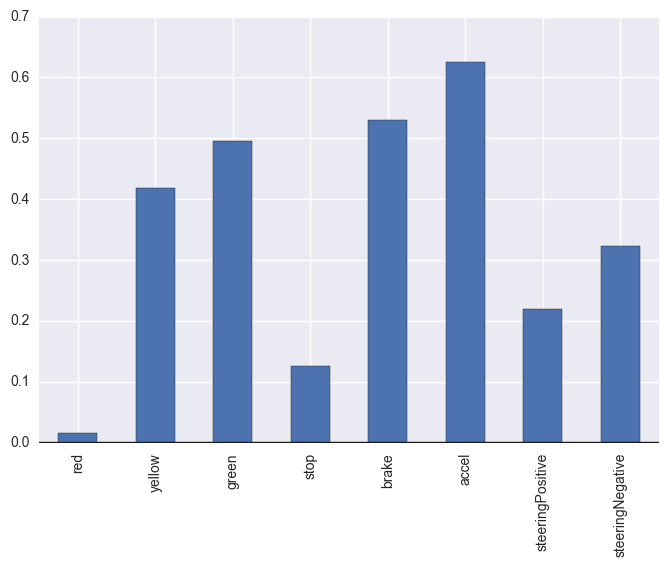

In [34]:
nf.ix[104].plot(kind='bar')
plt.axhline(0, color='k')

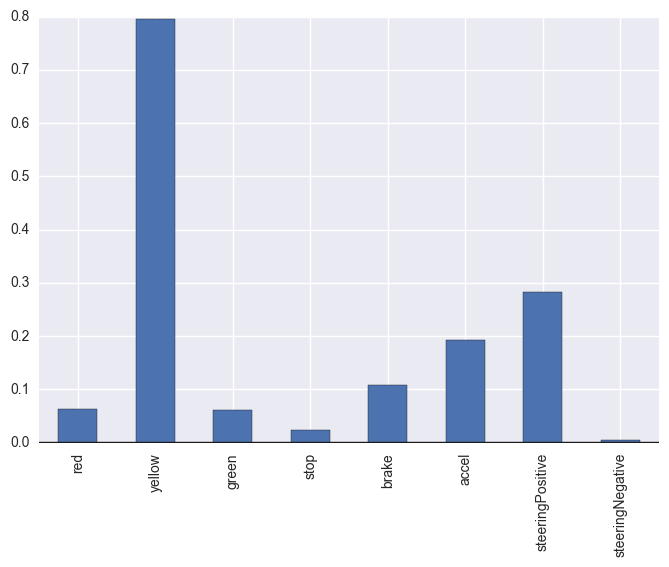

In [35]:
nf.ix[1367].plot(kind='bar')
plt.axhline(0, color='k')

# Pair plot

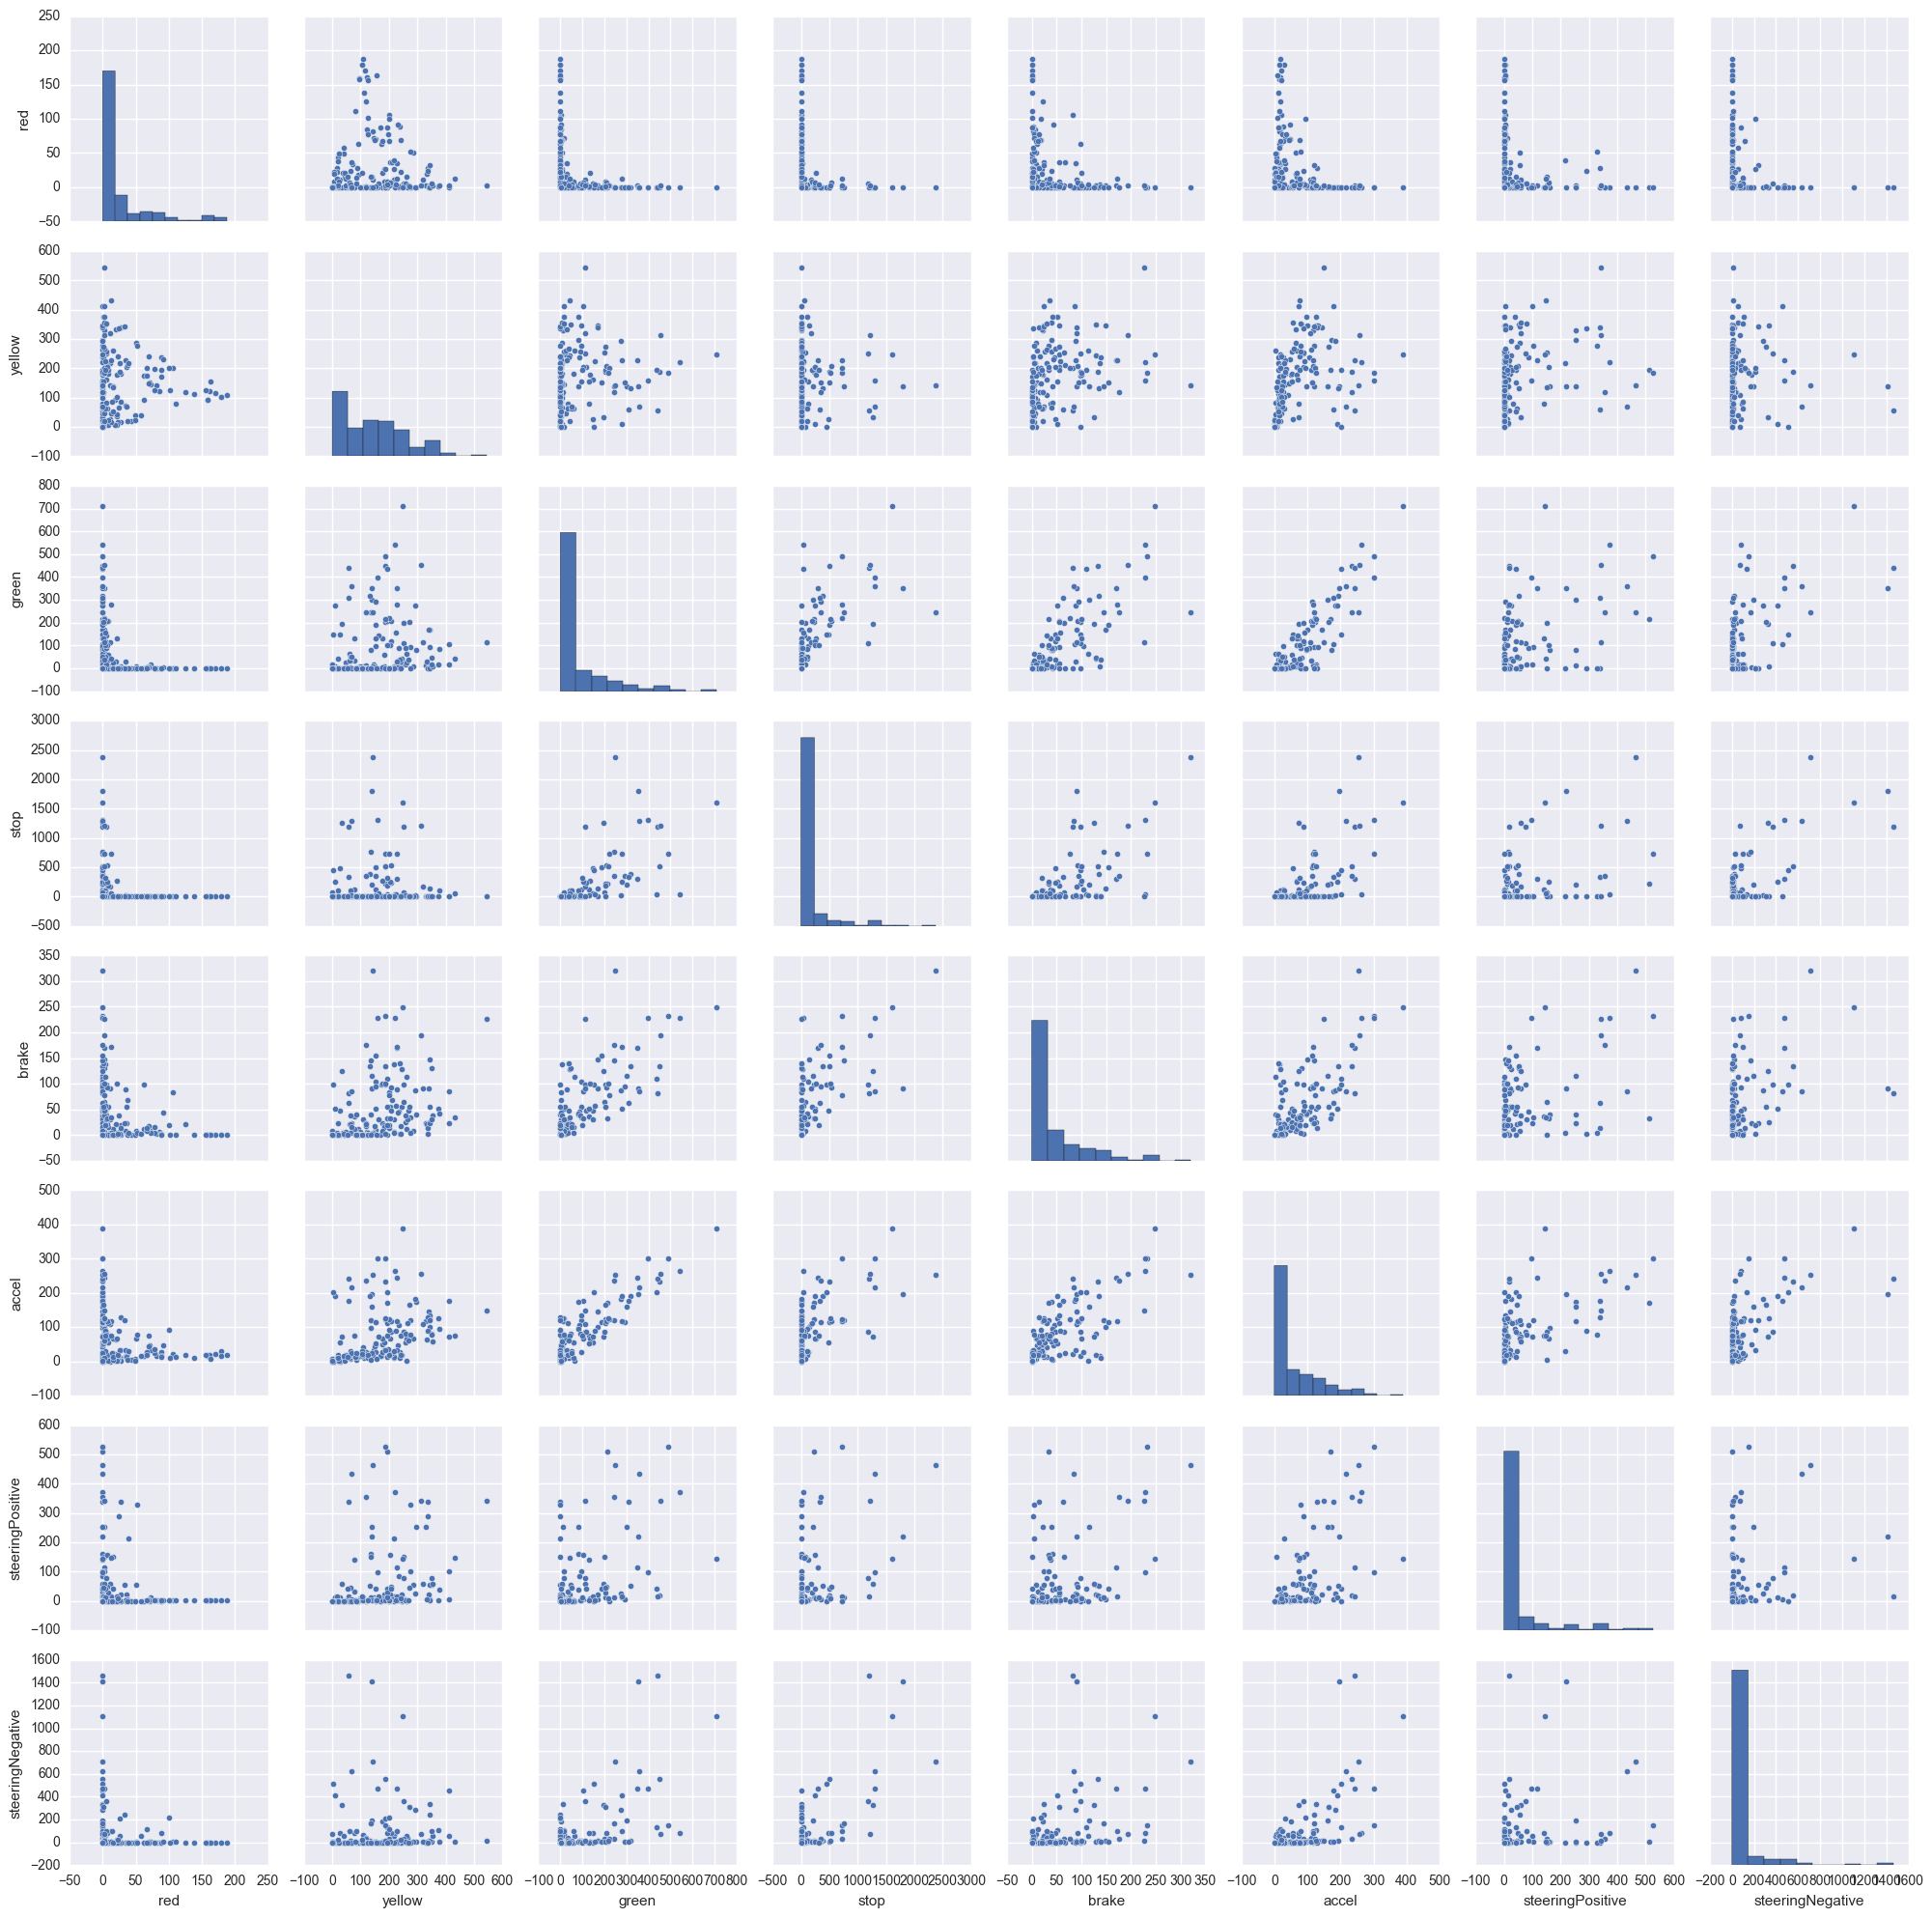

In [36]:
sns.pairplot(rmf)

# Brake

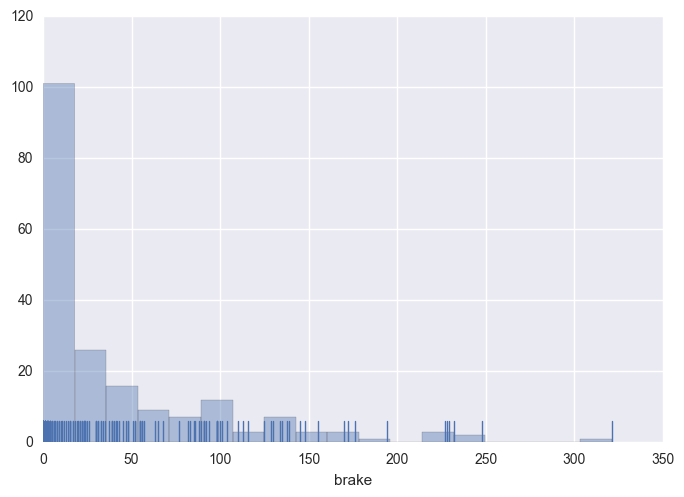

In [37]:
sns.distplot(rmf["brake"], kde=False, rug=True)

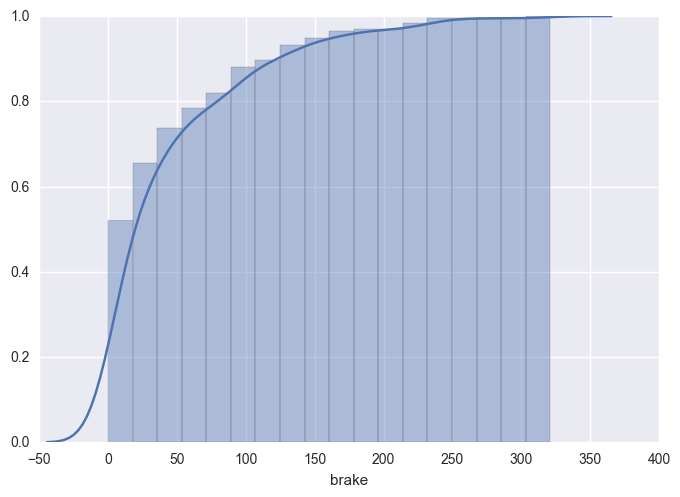

In [38]:
sns.distplot(rmf["brake"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

# Accel

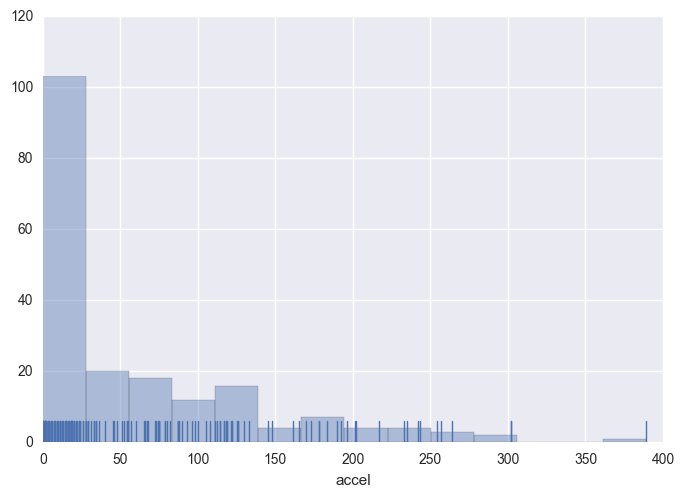

In [39]:
sns.distplot(rmf["accel"], kde=False, rug=True)

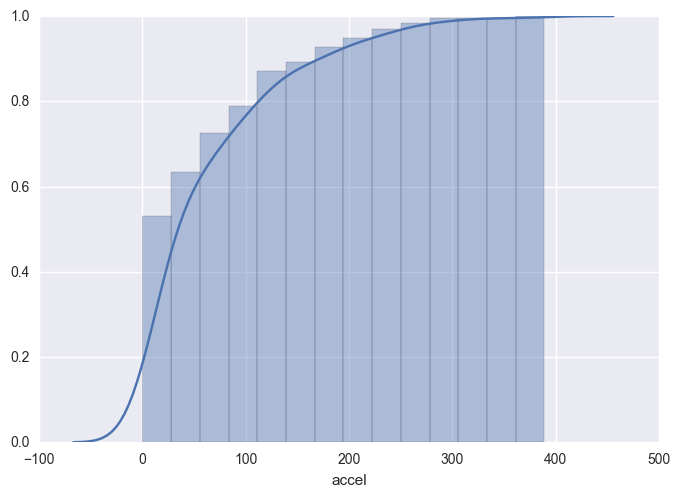

In [40]:
sns.distplot(rmf["accel"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

# SteeringPositive

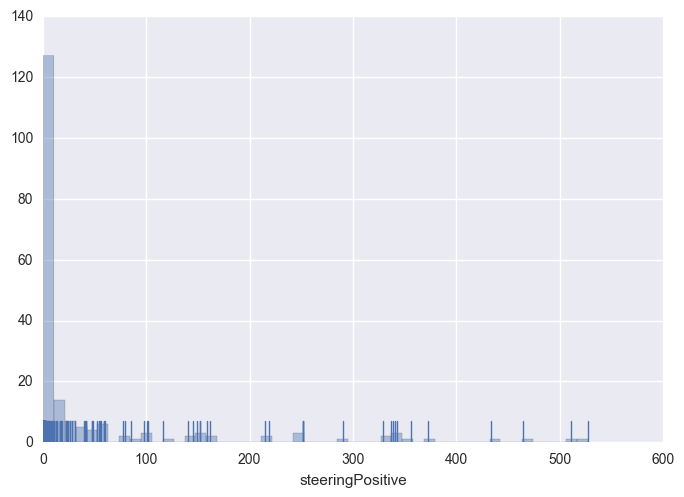

In [41]:
sns.distplot(rmf["steeringPositive"], kde=False, rug=True)

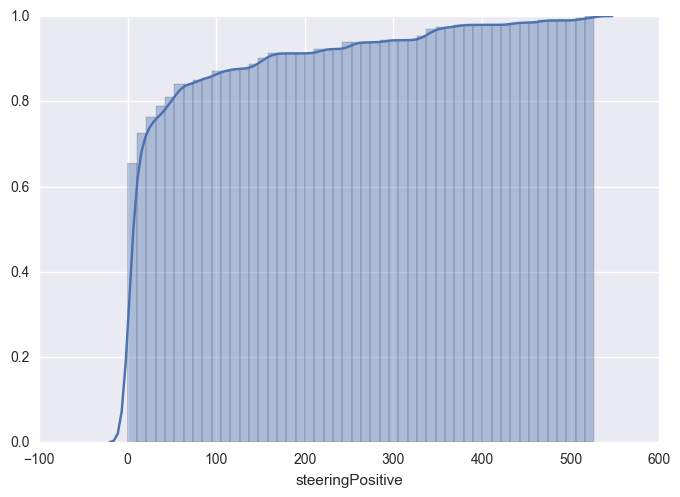

In [42]:
sns.distplot(rmf["steeringPositive"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [43]:
rmf.sort_values("steeringPositive", ascending=False)[:10]

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
454,0,186,489,729,232,302,527,153
379,0,193,214,224,33,170,511,2
1323,0,143,247,2380,321,254,465,710
955,0,68,358,1295,85,217,434,628
586,0,220,543,43,228,264,373,81
747,0,120,244,345,176,235,356,29
1488,3,543,114,13,227,148,343,13
1326,3,314,453,1214,194,257,341,71
869,28,338,0,0,14,130,339,0
728,0,58,308,333,63,178,337,9


# SteeringNegative

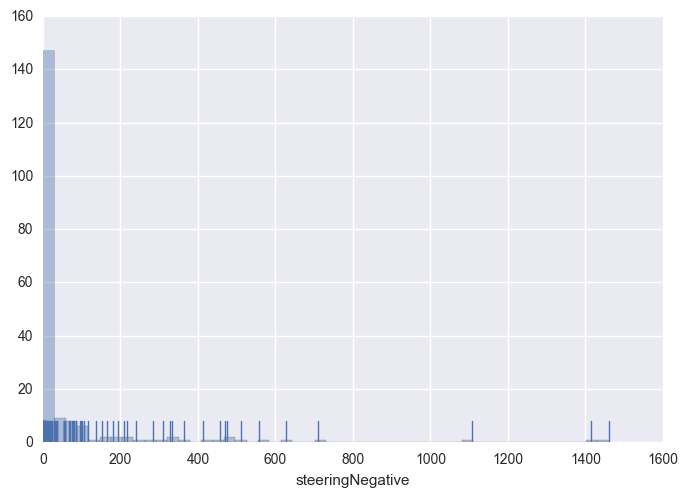

In [44]:
sns.distplot(rmf["steeringNegative"], kde=False, rug=True)

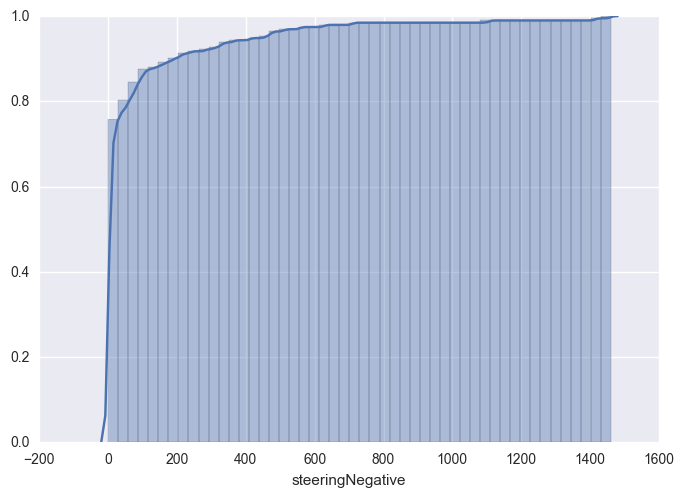

In [45]:
sns.distplot(rmf["steeringNegative"], 
             hist_kws=dict(cumulative=True), 
             kde_kws=dict(cumulative=True))

In [46]:
rmf.sort_values("steeringNegative", ascending=False)[:10]

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
841,0,57,439,1197,82,242,17,1460
527,0,140,352,1802,91,196,219,1415
1528,0,247,709,1609,248,389,145,1106
1323,0,143,247,2380,321,254,465,710
955,0,68,358,1295,85,217,434,628
406,0,187,448,509,134,233,18,557
632,0,2,150,451,98,202,1,511
874,0,159,398,1307,229,302,98,475
104,3,227,351,302,170,243,116,471
103,0,412,104,11,86,178,6,457


# VBGMM (raw)

In [104]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=100).fit(rmf)
set(vb.predict(rmf))

{0, 1, 2, 3, 4, 5, 6}

In [105]:
pred = zip(rmf.index, vb.predict(rmf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters1.csv", result, delimiter=",", fmt="%d")

In [106]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,8.872003,30.086091,6.537721,8.565891,3.618856,7.761492,3.563189,3.951811
1,3.515631,140.664141,374.778021,1273.132114,143.026374,227.196675,191.876552,848.597861
2,67.632108,168.272251,8.101683,4.437882,27.376596,27.522400,5.955160,22.020228
3,5.032068,166.135056,171.161223,313.624369,78.233887,90.930355,17.776079,33.545786
4,9.967247,311.651087,56.001822,32.427446,48.679449,98.843760,113.378223,54.860783
5,2.207712,157.502117,263.416623,180.876827,94.829877,171.948566,172.233406,186.688393
6,5.607102,180.758019,286.087909,970.703864,152.968521,180.014811,191.442815,243.107443


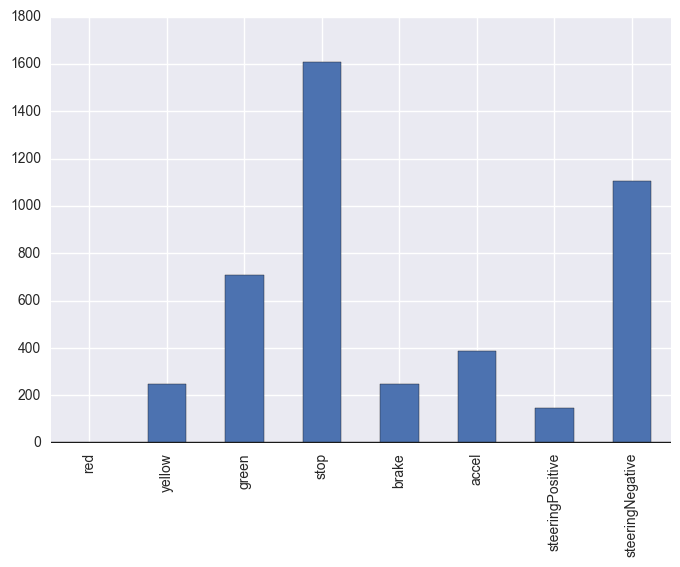

In [107]:
rmf.ix[1528].plot(kind='bar')
plt.axhline(0, color='k')

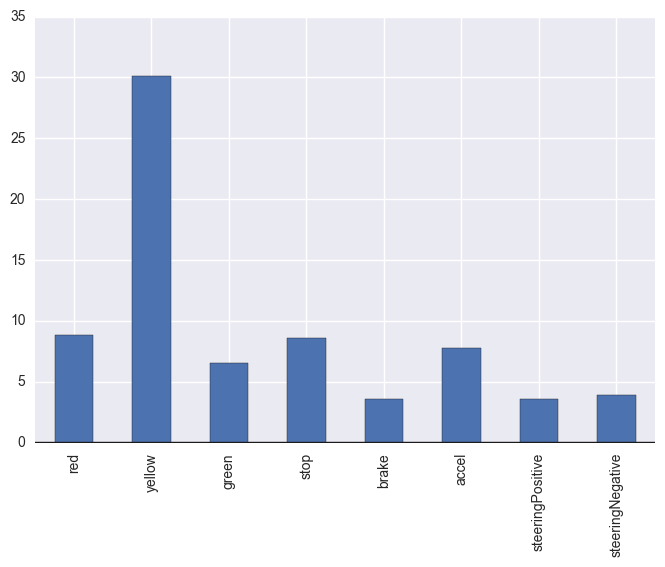

In [108]:
ref.ix[0].plot(kind='bar')
plt.axhline(0, color='k')

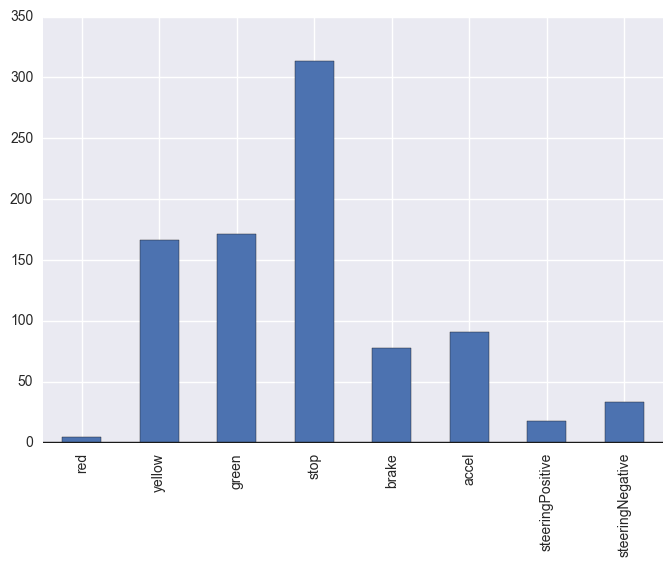

In [109]:
ref.ix[3].plot(kind='bar')
plt.axhline(0, color='k')

# VBBMM (binary)

In [49]:
bf = rmf.copy()

In [50]:
bf["red"] = bf["red"].mask(bf["red"] > 0, 1)
bf["yellow"] = bf["yellow"].mask(bf["yellow"] < 50, 0)
bf["yellow"] = bf["yellow"].mask(bf["yellow"] >= 50, 1)
bf["green"] = bf["green"].mask(bf["green"] > 0, 1)
bf["stop"] = bf["stop"].mask(bf["stop"] > 0, 1)

In [51]:
bf["brake"] = bf["brake"].mask(bf["brake"] < 50, 0)
bf["brake"] = bf["brake"].mask(bf["brake"] >= 50, 1)

In [52]:
bf["accel"] = bf["accel"].mask(bf["accel"] < 100, 0)
bf["accel"] = bf["accel"].mask(bf["accel"] >= 100, 1)

In [53]:
bf["steeringPositive"] = bf["steeringPositive"].mask(bf["steeringPositive"] < 10, 0)
bf["steeringPositive"] = bf["steeringPositive"].mask(bf["steeringPositive"] >= 10, 1)

In [54]:
bf["steeringNegative"] = bf["steeringNegative"].mask(bf["steeringNegative"] < 10, 0)
bf["steeringNegative"] = bf["steeringNegative"].mask(bf["steeringNegative"] >= 10, 1)

In [55]:
bf.describe()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.644330,0.711340,0.639175,0.515464,0.278351,0.231959,0.350515,0.335052
std,0.479954,0.454312,0.481482,0.501054,0.449347,0.423175,0.478366,0.473230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
vb = VBBMM(n_components=7).fit(bf)
set(vb.predict(bf))

{0, 1, 2, 3, 4, 5, 6}

In [57]:
pred = zip(bf.index, vb.predict(bf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters2.csv", result, delimiter=",", fmt="%d")

# VBGMM (normalize only)

In [110]:
tf = rmf.copy()

In [111]:
tf["brake"] = tf["brake"].mask(tf["brake"] < 50, 0)

In [112]:
tf["accel"] = tf["accel"].mask(tf["accel"] < 10, 0)

In [113]:
tf["steeringPositive"] = tf["steeringPositive"].mask(tf["steeringPositive"] < 10, 0)

In [114]:
tf["steeringNegative"] = tf["steeringNegative"].mask(tf["steeringNegative"] < 10, 0)

In [115]:
tf = tf.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [116]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(tf)
set(vb.predict(tf))

{0, 1, 2, 3, 4, 5, 6}

In [117]:
pred = zip(tf.index, vb.predict(tf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters3.csv", result, delimiter=",", fmt="%d")

# VBGMM (threshold only)

In [58]:
tf = rmf.copy()

In [59]:
tf["brake"] = tf["brake"].mask(tf["brake"] < 50, 0)

In [60]:
tf["accel"] = tf["accel"].mask(tf["accel"] < 10, 0)

In [61]:
tf["steeringPositive"] = tf["steeringPositive"].mask(tf["steeringPositive"] < 10, 0)

In [62]:
tf["steeringNegative"] = tf["steeringNegative"].mask(tf["steeringNegative"] < 10, 0)

In [63]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(tf)
set(vb.predict(tf))

{0, 1, 2, 3, 4, 5, 6}

In [121]:
pred = zip(tf.index, vb.predict(tf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters4.csv", result, delimiter=",", fmt="%d")

In [119]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,0.055537,0.067764,0.008601,0.003236,0.001373,0.018890,0.005613,0.004323
1,0.017055,0.303749,0.324159,0.188201,0.285815,0.349240,0.060484,0.122134
2,0.055616,0.500984,0.064983,0.012006,0.025044,0.223527,0.203144,0.049046
3,0.026041,0.274996,0.555784,0.505987,0.425311,0.610730,0.197772,0.618243
4,0.014487,0.365038,0.415188,0.244414,0.450611,0.498684,0.652718,0.112915
5,0.465960,0.320232,0.009740,0.001783,0.002636,0.084723,0.006095,0.011086
6,0.093419,0.419839,0.109079,0.024987,0.273556,0.133497,0.024989,0.005562


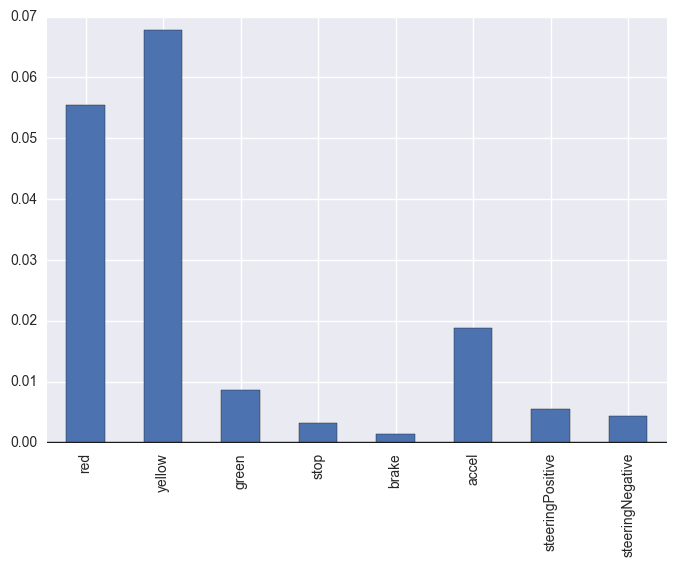

In [120]:
ref.ix[0].plot(kind='bar')
plt.axhline(0, color='k')

# VBGMM (threshold and normalize)

In [65]:
tf = rmf.copy()

In [66]:
tf["brake"] = tf["brake"].mask(tf["brake"] < 50, 0)

In [67]:
tf["accel"] = tf["accel"].mask(tf["accel"] < 10, 0)

In [68]:
tf["steeringPositive"] = tf["steeringPositive"].mask(tf["steeringPositive"] < 10, 0)

In [69]:
tf["steeringNegative"] = tf["steeringNegative"].mask(tf["steeringNegative"] < 10, 0)

In [70]:
tf = tf.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [71]:
tf.cov()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
red,0.051293,-0.000030,-0.012001,-0.006534,-0.010453,-0.011109,-0.007938,-0.004926
yellow,-0.000030,0.044929,0.008337,0.001716,0.013455,0.019025,0.012739,0.002331
green,-0.012001,0.008337,0.030721,0.017623,0.025779,0.029739,0.017107,0.014606
stop,-0.006534,0.001716,0.017623,0.020659,0.018249,0.017889,0.012383,0.014508
brake,-0.010453,0.013455,0.025779,0.018249,0.036392,0.026580,0.016876,0.011629
accel,-0.011109,0.019025,0.029739,0.017889,0.026580,0.036411,0.023021,0.016290
steeringPositive,-0.007938,0.012739,0.017107,0.012383,0.016876,0.023021,0.037851,0.006444
steeringNegative,-0.004926,0.002331,0.014606,0.014508,0.011629,0.016290,0.006444,0.018718


In [72]:
tf.describe()

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.131005,0.262421,0.099727,0.053701,0.101888,0.151803,0.084939,0.046766
std,0.226480,0.211966,0.175273,0.143734,0.190766,0.190816,0.194554,0.136816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.067680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.015957,0.251381,0.007052,0.000420,0.000000,0.059126,0.000000,0.000000
75%,0.142287,0.402394,0.133639,0.011134,0.171340,0.230077,0.048387,0.016267
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.001).fit(tf)
set(vb.predict(tf))

{0, 1, 2, 3, 4, 5, 6}

In [122]:
pred = zip(tf.index, vb.predict(tf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters5.csv", result, delimiter=",", fmt="%d")

In [87]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,stop,brake,accel,steeringPositive,steeringNegative
0,0.158486,0.404020,0.042763,0.010378,0.274261,0.080756,0.021883,0.016639
1,0.017178,0.371880,0.377950,0.252112,0.408815,0.456090,0.591165,0.114750
2,0.054478,0.066543,0.008623,0.003261,0.001381,0.018612,0.005538,0.004349
3,0.020993,0.304899,0.557670,0.411607,0.439006,0.611030,0.178235,0.543294
4,0.018976,0.382315,0.247119,0.115722,0.234191,0.308647,0.036404,0.075418
5,0.066176,0.474720,0.057889,0.008874,0.004436,0.201523,0.235324,0.033170
6,0.473843,0.313754,0.009025,0.001863,0.002747,0.075142,0.006600,0.006745


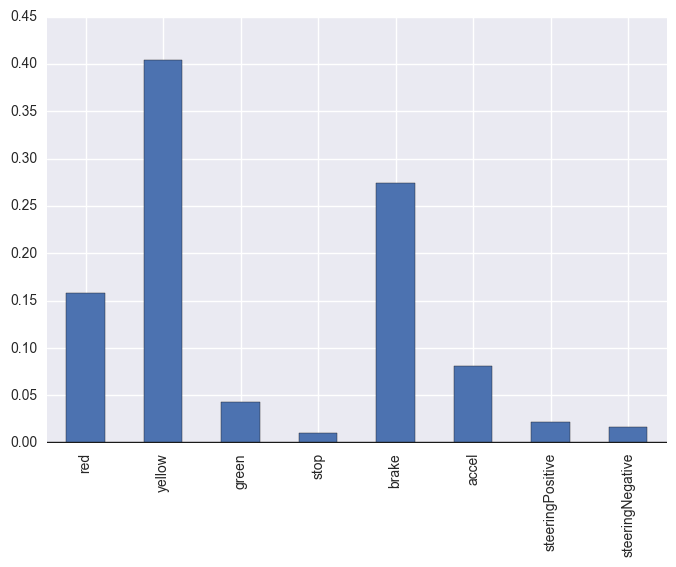

In [89]:
ref.ix[0].plot(kind='bar')
plt.axhline(0, color='k')

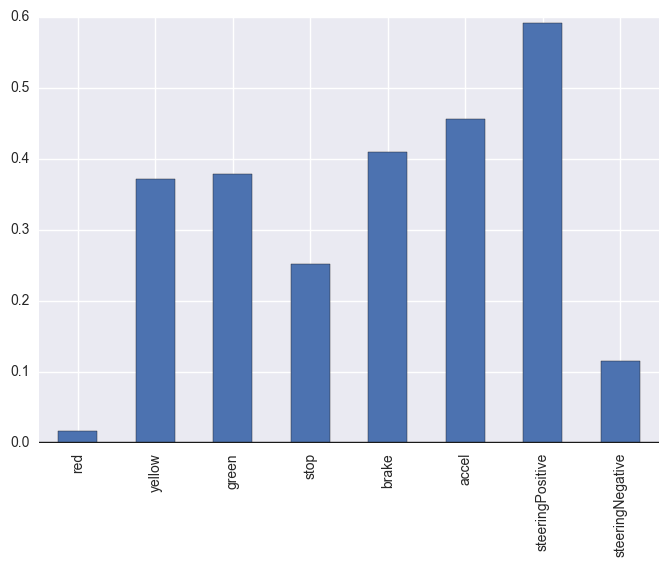

In [90]:
ref.ix[1].plot(kind='bar')
plt.axhline(0, color='k')

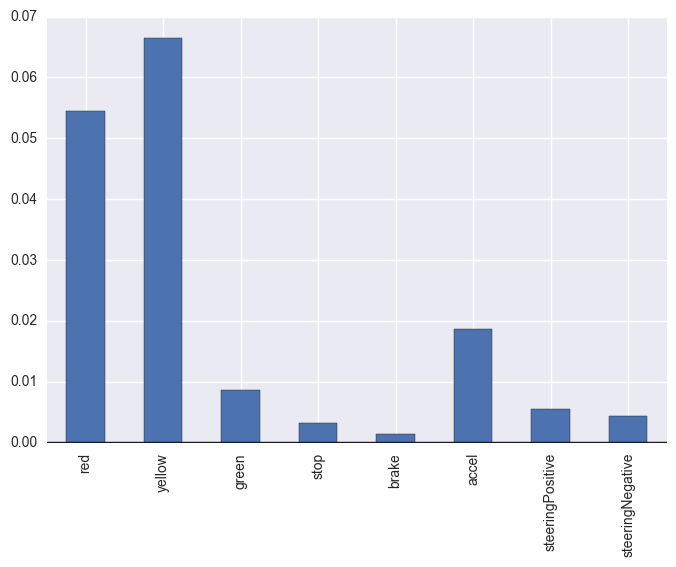

In [91]:
ref.ix[2].plot(kind='bar')
plt.axhline(0, color='k')

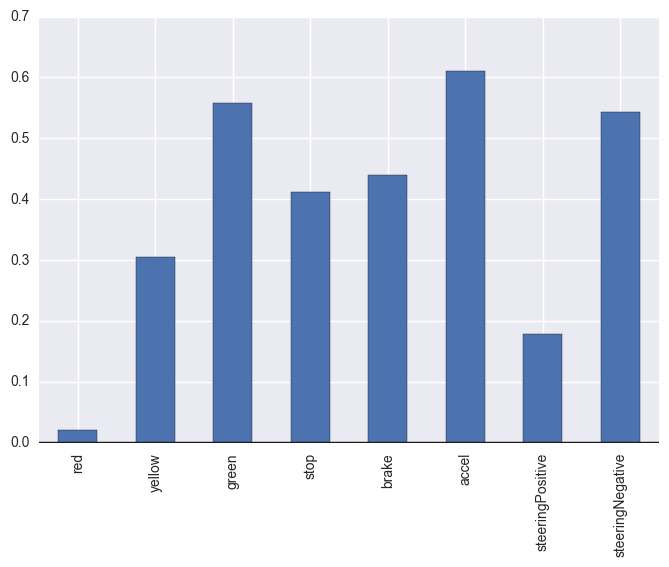

In [92]:
ref.ix[3].plot(kind='bar')
plt.axhline(0, color='k')